In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

Собственные числа:  
$\lambda_1 = 199$  
$\lambda_2 = -1$  

In [2]:
class RK4_var3:

    def __init__(self, t_init, t_final):
        self.rhs_matrix = np.array([[99, 250], 
                                    [40, 99]])
        
        self.eigenvalues, self.eigenvectors = LA.eig(self.rhs_matrix)
        self.init_state = self.eigenvectors[0]

        self.t_init = t_init
        self.t_final = t_final
        self.h = (t_final - t_init) / 10

        self.A = np.array([[-2.5, 2.5], [1, 1]])

    def solve(self):
        self.precise_solution_constants = LA.solve(self.A, self.init_state)

        self.number_of_steps = int((self.t_final - self.t_init) / self.h + 1)
        self.t_mesh = np.linspace(self.t_init, self.t_final, self.number_of_steps)
        self.u_values = np.zeros((self.number_of_steps, 2))
        self.u_values[0] = self.init_state
        
        for i in range(1, self.number_of_steps):
            k1 = np.dot(self.rhs_matrix, self.u_values[i - 1])
            k2 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 0.5 * self.h * k1)
            k3 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 0.5 * self.h * k2)
            k4 = np.dot(self.rhs_matrix, self.u_values[i - 1] + 1.0 * self.h * k3)

            self.u_values[i] = self.u_values[i - 1] + self.h * (k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6)

    def preciseSolution(self, t):
        self.solve()
        c1 = self.precise_solution_constants[0]
        c2 = self.precise_solution_constants[1]
        tmp = np.array([[-2.5 * c1, 2.5 * c2], [c1, c2]])
        tmp1 = np.array((np.exp(-t), np.exp(199 * t)))
        return np.dot(tmp, tmp1).transpose()

    def setInitStateEig(self, init_state):
        if init_state == 'Eig1':
            self.init_state = self.eigenvectors[0]
        elif init_state == 'Eig2':
            self.init_state = self.eigenvectors[1]

    def setInitStateVect(self, init_state):
        self.init_state = init_state
    
    def setNumberOfPoints(self, number_of_points):
        self.h = (self.t_final - self.t_init) / number_of_points
        self.solve()

    def setH(self, h):
        self.h = h
        self.solve()

    def printEig(self):
        print(f'Vect1 = {self.eigenvectors[0]}\t\tVal1 = {self.eigenvalues[0]:.1f}')
        print(f'Vect2 = {self.eigenvectors[1]}\t\tVal2 = {self.eigenvalues[1]:.1f}')



In [3]:
rk4 = RK4_var3(0., 0.01)
rk4.solve()
rk4.setNumberOfPoints(2048)
y1_precise = rk4.preciseSolution(rk4.t_mesh)[:, 0]
y1 = rk4.u_values[:, 0]
delta_1 = np.abs(y1_precise - y1)
y2_precise = rk4.preciseSolution(rk4.t_mesh)[:, 1]
y2 = rk4.u_values[:, 1]
delta_2 = np.abs(y2_precise - y2)

df = pd.DataFrame(index= ['y1', 'y1_precise', 'delta_1', 'y2', 'y2_precise', 'delta_2'], columns=[f'{i:.1f}' for i in rk4.t_mesh], dtype=np.float64)
df.loc['y1'] = [y1[t] for t in range(rk4.t_mesh.size)]
df.loc['y1_precise'] = [y1_precise[t] for t in range(rk4.t_mesh.size)]
df.loc['delta_1'] = [delta_1[t] for t in range(rk4.t_mesh.size)]
df.loc['y2'] = [y2[t] for t in range(rk4.t_mesh.size)]
df.loc['y2_precise'] = [y2_precise[t] for t in range(rk4.t_mesh.size)]
df.loc['delta_2'] = [delta_2[t] for t in range(rk4.t_mesh.size)]

df = df.transpose()
df.to_excel('results.xlsx')

rk4.printEig()

Vect1 = [ 0.92847669 -0.92847669]		Val1 = 199.0
Vect2 = [0.37139068 0.37139068]		Val2 = -1.0


In [4]:
h_low = 10
h_high = 14
hs = [1 / (2 ** i) for i in range(h_low, h_high)]

errors = []

for h in hs:
    rk4_test = RK4_var3(0., 1)
    rk4_test.setInitStateEig('Eig1')
    rk4_test.setH(h)
    sol = rk4_test.u_values
    prec = rk4_test.preciseSolution(rk4_test.t_mesh)
    errors.append(np.max(LA.norm(sol - prec, axis=1)))

print(hs)
print(np.log(hs))

[0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125]
[-6.93147181 -7.62461899 -8.31776617 -9.01091335]


h_low = 2^(-10)
h_high = 2^(-14)


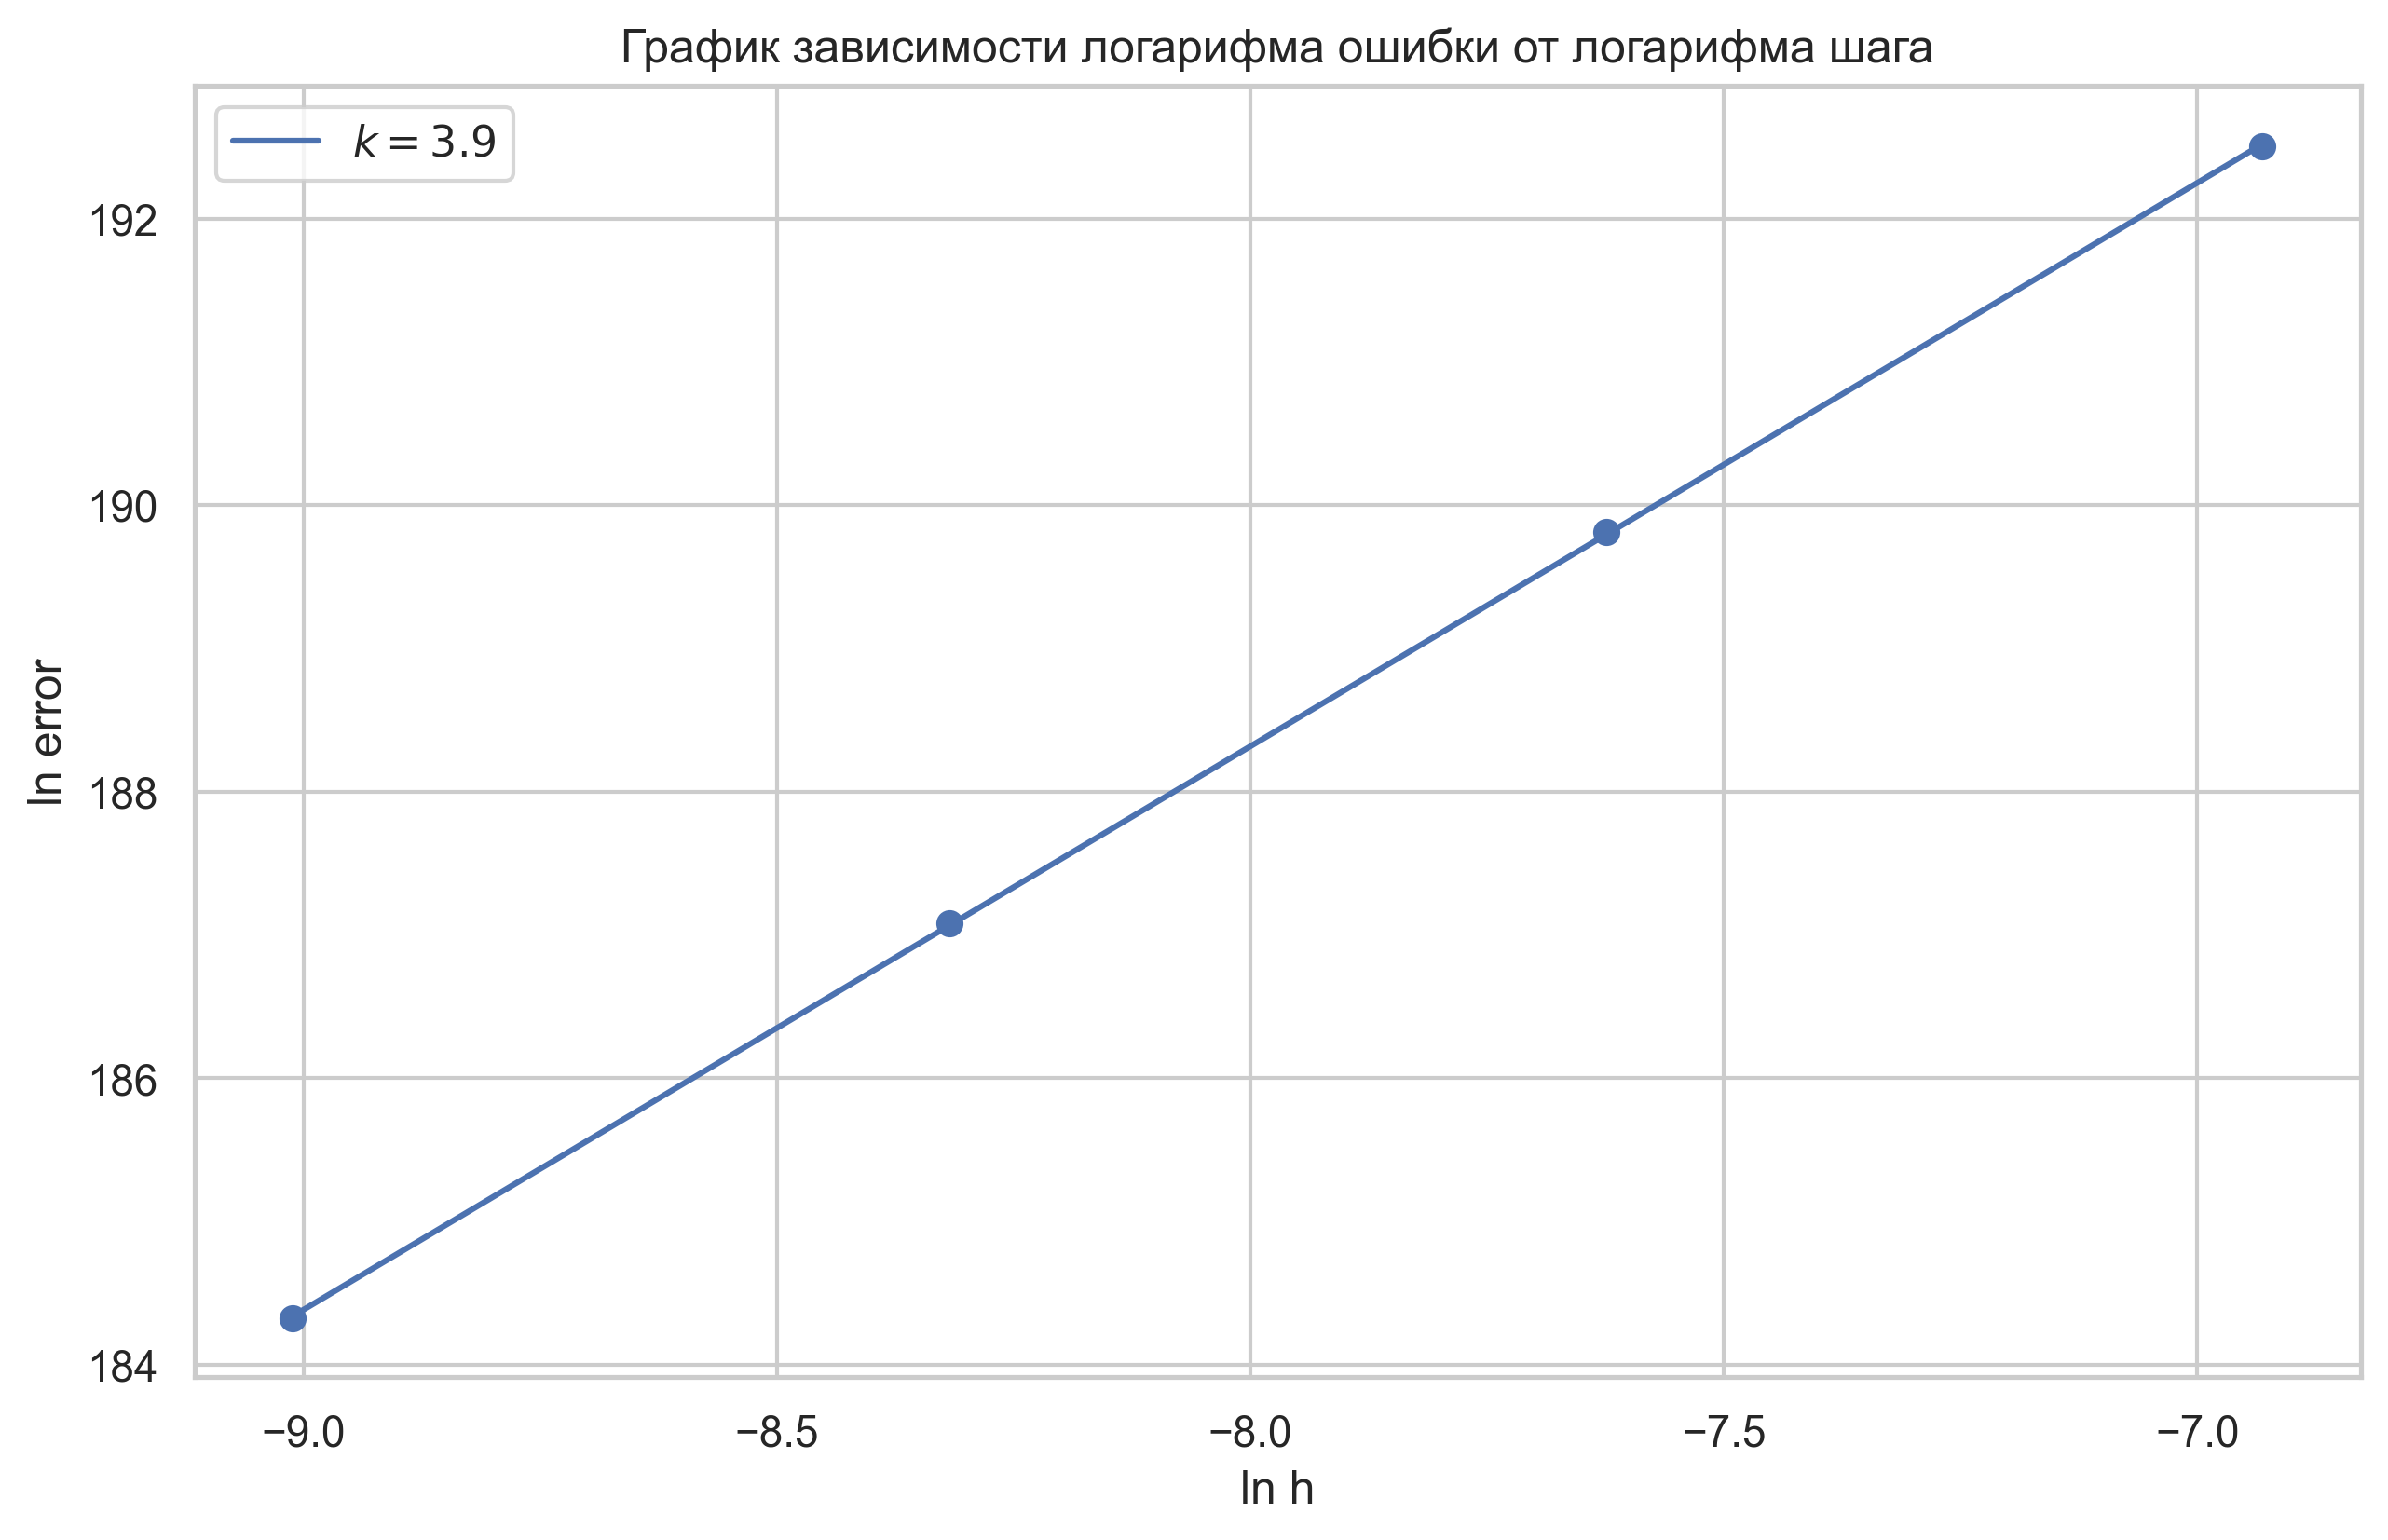

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')


x = np.log(hs)
y = np.log(errors)
plf = np.polyfit(x, y, 1)
yy = np.polyval(plf, x)

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(x, y)
plt.plot(x, yy, label = f'$k = {plf[0]:.1f}$')
plt.xlabel('ln h')
plt.ylabel('ln error')
plt.legend()
plt.title('График зависимости логарифма ошибки от логарифма шага')
print(f'h_low = 2^(-{h_low})')
print(f'h_high = 2^(-{h_high})')